In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from glob import glob

In [2]:
image = glob('./image_capton/*.jpg')
len(image)

8091

In [3]:
image[:6]

['./image_capton\\1000268201_693b08cb0e.jpg',
 './image_capton\\1001773457_577c3a7d70.jpg',
 './image_capton\\1002674143_1b742ab4b8.jpg',
 './image_capton\\1003163366_44323f5815.jpg',
 './image_capton\\1007129816_e794419615.jpg',
 './image_capton\\1007320043_627395c3d8.jpg']

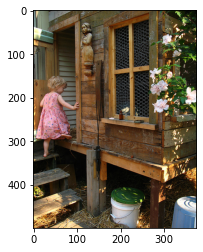

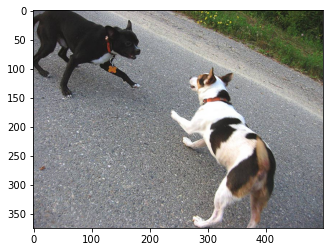

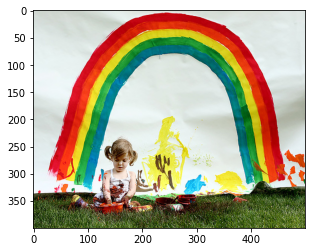

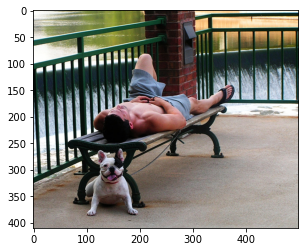

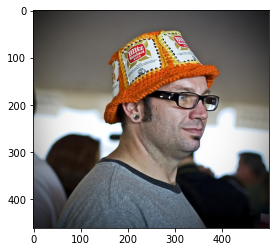

In [4]:
for i in range(5):
    plt.figure()
    img  = cv2.imread(image[i])
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [5]:
from keras.applications import ResNet50
incept_model = ResNet50(include_top = True)

In [6]:
incept_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input, outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [8]:
image[0].split('\\')[-1]

'1000268201_693b08cb0e.jpg'

In [9]:
images_features = {}
count = 0
for i in image:
    img = cv2.imread(i)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
    img_name = i.split('\\')[-1]
    images_features[img_name] = pred
    count += 1
    if count > 1499:
        break;
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [10]:
caption = open('captions/captions.txt','rb').read().decode('utf-8').split('\n')


In [11]:
count = 0 
c = False
captions_dict = {}
try:
    for i in caption:
        if c == False:
            c = True
        else:
            img_name = i.split(',')[0]
            captions = i.split(',')[-1]
            if  img_name not in captions_dict:
                captions_dict[img_name] = [captions]
                count += 1
            else:
                captions_dict[img_name].append(captions)
            if count > 1499:
                break
except:
    pass

In [13]:
def preprocessed(txt):
    modified = 'startofseq ' + txt.lower() + ' endofseq'
    return modified

In [14]:
for k,v in captions_dict.items():
    for  vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)
captions_dict

{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq',
  'startofseq a girl going into a wooden building . endofseq',
  'startofseq a little girl climbing into a wooden playhouse . endofseq',
  'startofseq a little girl climbing the stairs to her playhouse . endofseq',
  'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'],
 '1001773457_577c3a7d70.jpg': ['startofseq a black dog and a spotted dog are fighting endofseq',
  'startofseq a black dog and a tri-colored dog playing with each other on the road . endofseq',
  'startofseq a black dog and a white dog with brown spots are staring at each other in the street . endofseq',
  'startofseq two dogs of different breeds looking at each other on the road . endofseq',
  'startofseq two dogs on pavement moving toward each other . endofseq'],
 '1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rai

In [15]:
count_words = {}
count = 1
for k,vv in captions_dict.items():
    for v in vv:
        for  words  in v.split():
            if words not in count_words:
                count_words[words] = count
                count += 1                

In [16]:
for k,vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            if word not in count_words:
                encoded.append(count_words['<out>'])
            else:
                encoded.append(count_words[word])
        captions_dict[k][vv.index(v)] = encoded   
   

In [17]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

In [18]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [19]:
MAX_LEN = 0
for k,vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
print(MAX_LEN)            

36


In [20]:
vocab_size = len(count_words)
def generator(photo,caption):
    n_samples = 0
    x = []
    y_in = []
    y_out = []
    for k,vv in caption.items():
        for v in vv:
            for i in range(1,len(v)):
                x.append(photo[k])
                in_seq = [v[:i]]
                out_seq = v[i]
                
                in_seq = pad_sequences(in_seq, maxlen = MAX_LEN, padding ='post', truncating = 'post')[0]
                out_seq = to_categorical([out_seq], num_classes = vocab_size+1)[0]
                
                y_in.append(in_seq)
                y_out.append(out_seq)
    return x,y_in,y_out            
    

In [21]:
X,y_in,y_out = generator(images_features,captions_dict)

In [22]:
len(X),len(y_in),len(y_out)

(93034, 93034, 93034)

In [23]:
X  = np.array(X)
y_in = np.array(y_in, dtype = 'float64')
y_out = np.array(y_out, dtype = 'float64')
X.shape,y_in.shape,y_out.shape

((93034, 2048), (93034, 36), (93034, 3946))

In [24]:
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, Embedding, Input, Dropout, Flatten, Activation
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import RepeatVector, Concatenate, Activation, Bidirectional, TimeDistributed

In [25]:
from keras.layers import Convolution2D

In [28]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = 3946
image_model = Sequential()
image_model.add(Dense(embedding_size,input_shape = (2048,), activation = 'relu'))
image_model.add(RepeatVector(max_len))
image_model.summary()

language_model = Sequential()
language_model.add(Embedding(input_dim = vocab_size,output_dim = embedding_size, input_length = max_len))
language_model.add(LSTM(256, return_sequences = True))
language_model.add(TimeDistributed(Dense(embedding_size)))
language_model.summary()
conca = Concatenate()([image_model.output,language_model.output])
x = LSTM(128,return_sequences = True)(conca)
x = LSTM(128,return_sequences = False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs = [image_model.input, language_model.input], outputs = out)
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 36, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 36, 128)           505088    
_________________________________________________________________
lstm_3 (LSTM)                (None, 36, 256)           394240    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 36, 128)           32896     
Total params: 932,224
Trai

In [29]:
model.fit([X,y_in], y_out, batch_size = 512, epochs = 40)

Epoch 1/40
182/182 [==============================] - 458s 2s/step - loss: 5.6937 - accuracy: 0.1073
Epoch 2/40
182/182 [==============================] - 507s 3s/step - loss: 4.9168 - accuracy: 0.2001
Epoch 3/40
182/182 [==============================] - 553s 3s/step - loss: 4.5986 - accuracy: 0.2343
Epoch 4/40
182/182 [==============================] - 590s 3s/step - loss: 4.4129 - accuracy: 0.2461
Epoch 5/40
182/182 [==============================] - 595s 3s/step - loss: 4.1519 - accuracy: 0.2827
Epoch 6/40
182/182 [==============================] - 593s 3s/step - loss: 3.9161 - accuracy: 0.3048
Epoch 7/40
182/182 [==============================] - 596s 3s/step - loss: 3.7209 - accuracy: 0.3257
Epoch 8/40
182/182 [==============================] - 604s 3s/step - loss: 3.5833 - accuracy: 0.3382
Epoch 9/40
182/182 [==============================] - 593s 3s/step - loss: 3.4718 - accuracy: 0.3537
Epoch 10/40
182/182 [==============================] - 593s 3s/step - loss: 3.3843 - accura

In [30]:
model.save('mine_model_weights.h5')

In [31]:
inv_dict ={v:k for k,v in count_words.items()}

In [32]:
def getimage(x):
    test_img_path = image[x]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(224,224))
    plt.imshow(test_img)
    test_img = np.reshape(test_img, (1,224,224,3))
    return test_img

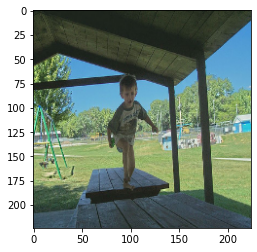

In [33]:
test_feature = modele.predict(getimage(251)).reshape(1,2048)

In [34]:
text_inp = ['startofseq']
count = 0
caption = ''
while count < 25:
    count +=1
    encoded = []
    for i in text_inp:
        encoded.append(count_words[i])
    encoded = [encoded]    
    encoded = pad_sequences(encoded, truncating = 'post', maxlen = MAX_LEN)
    prediction =np.argmax(model.predict([test_feature, encoded]))
    sampled_words = inv_dict[prediction]
    caption = caption + ' ' + sampled_words
    if sampled_words == 'endofseq':
        break
text_inp.append(sampled_words)        

In [35]:
caption

' in in in in in in in in in in in in in in in in in in in in in in in in in'